# Stock Market Analysis and Prediction using Long Short Term Memory (LSTM)

## 1. Change in price of the stock Overtime

### Describing the Dataset

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300,AMAZON
2024-03-06,175.539993,176.460007,173.259995,173.509995,173.509995,32090900,AMAZON
2024-03-07,174.830002,177.990005,173.720001,176.820007,176.820007,34063300,AMAZON
2024-03-08,176.440002,178.789993,174.330002,175.350006,175.350006,37853500,AMAZON
2024-03-11,174.309998,174.470001,171.470001,171.960007,171.960007,28484800,AMAZON
2024-03-12,173.500000,176.759995,171.979996,175.389999,175.389999,36610600,AMAZON
2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30772600,AMAZON
2024-03-14,177.690002,179.529999,176.470001,178.750000,178.750000,43705800,AMAZON


### Descriptive Statistics about the Data

In [8]:
# Describing the Apple Data
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,180.211554,181.666295,178.890119,180.382112,179.890954,5.750040e+07
std,10.203647,10.061169,10.122922,10.060545,10.169605,1.721862e+07
min,155.070007,156.740005,154.149994,155.000000,154.177048,2.404830e+07
25%,173.010002,174.220001,171.675003,173.334999,172.699242,4.678545e+07
50%,180.669998,182.229996,178.550003,180.710007,180.238220,5.337730e+07
75%,189.294998,189.990005,187.695000,189.334999,188.909798,6.344460e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [9]:
# Describing the Google Data
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,129.310176,130.756435,128.164183,129.506474,129.506474,2.372488e+07
std,12.808689,12.762353,12.766494,12.757651,12.757651,8.892498e+06
min,100.839996,101.610001,100.279999,101.320000,101.320000,8.828600e+06
25%,122.080002,123.917500,121.474998,122.830002,122.830002,1.815580e+07
50%,131.970001,133.500000,130.750000,131.889999,131.889999,2.147350e+07
75%,138.595001,139.959999,137.555000,138.739998,138.739998,2.631035e+07
max,154.009995,155.199997,152.919998,154.839996,154.839996,7.614030e+07


In [10]:
# Describing the Microsoft Data
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,344.909960,347.941116,341.881195,345.094104,343.705541,2.588544e+07
std,38.289552,38.334263,38.098589,38.375575,39.003585,9.837698e+06
min,273.399994,275.000000,269.519989,272.230011,270.013916,1.017660e+07
25%,320.814987,324.240005,318.404999,321.095001,319.395615,2.042715e+07
50%,335.089996,337.959991,332.549988,335.399994,333.396942,2.339210e+07
75%,373.574997,375.550003,370.494995,374.300003,373.609100,2.779310e+07
max,420.559998,427.820007,417.989990,425.220001,425.220001,7.847820e+07


In [11]:
# Describing the Amazon Data
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,135.432072,136.976016,133.981355,135.559283,135.559283,5.385040e+07
std,20.732548,20.814288,20.725559,20.826721,20.826721,1.897677e+07
min,98.070000,98.300003,95.699997,97.239998,97.239998,2.237840e+07
25%,125.020000,126.864998,124.000000,125.395000,125.395000,4.274660e+07
50%,133.779999,135.139999,132.529999,133.679993,133.679993,4.978330e+07
75%,147.555000,148.915001,145.760002,147.449997,147.449997,5.976790e+07
max,177.690002,180.139999,177.490005,178.750000,178.750000,1.529387e+08


### Information About the Data

In [12]:
# Apple information
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-17 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [13]:
# Google Information
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-17 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [14]:
# Microsoft Information
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-17 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [15]:
# Amazonr Information
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-17 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


### Closing Price

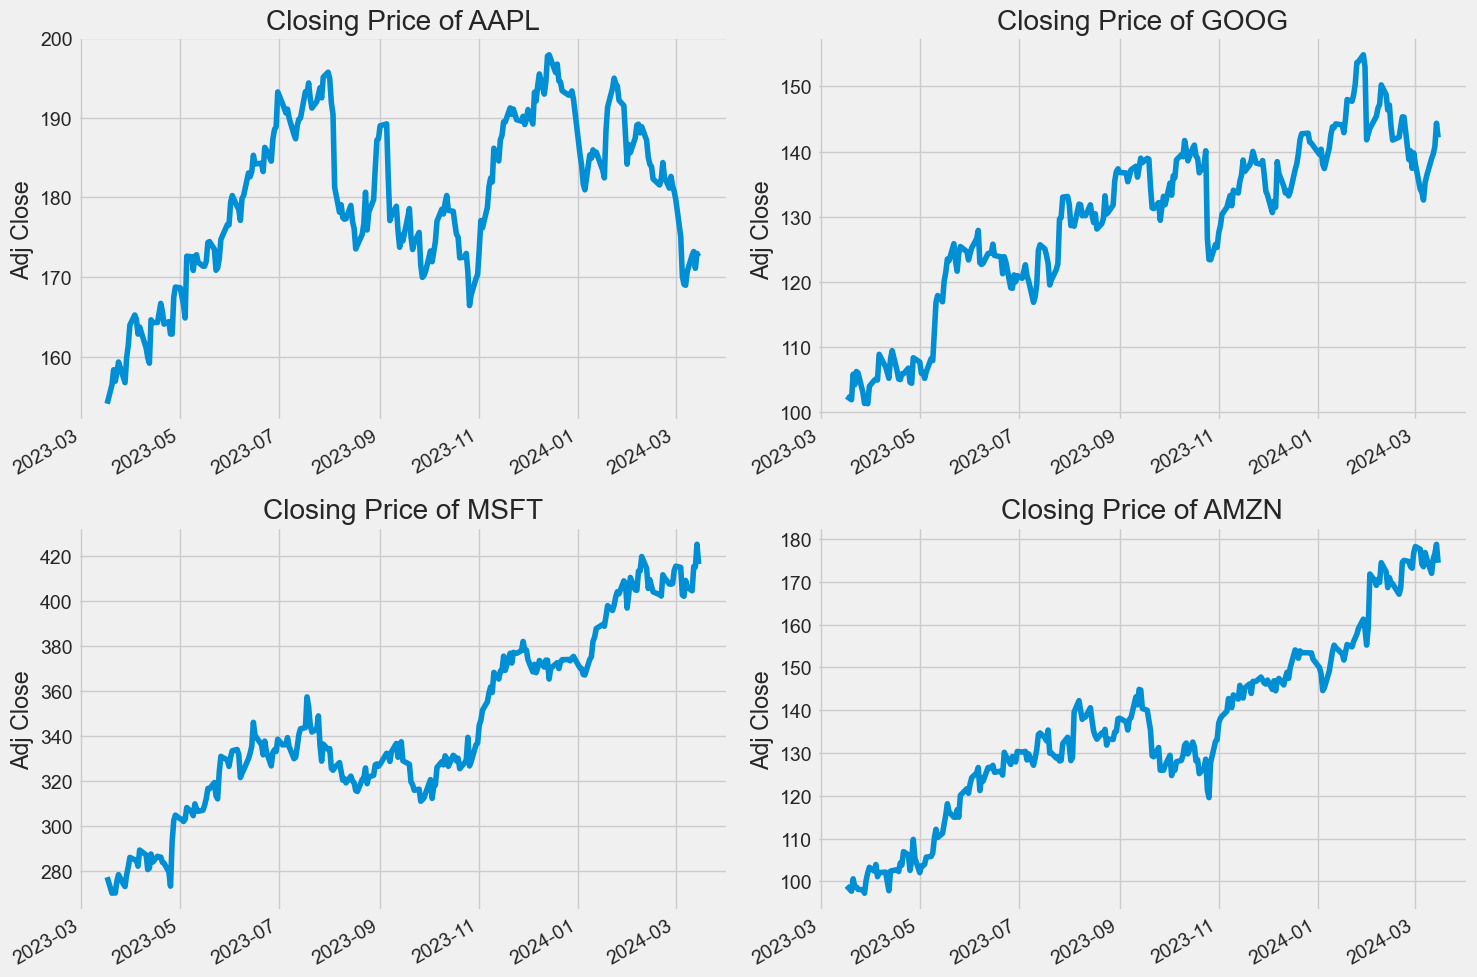

In [16]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

### Volume of Sales

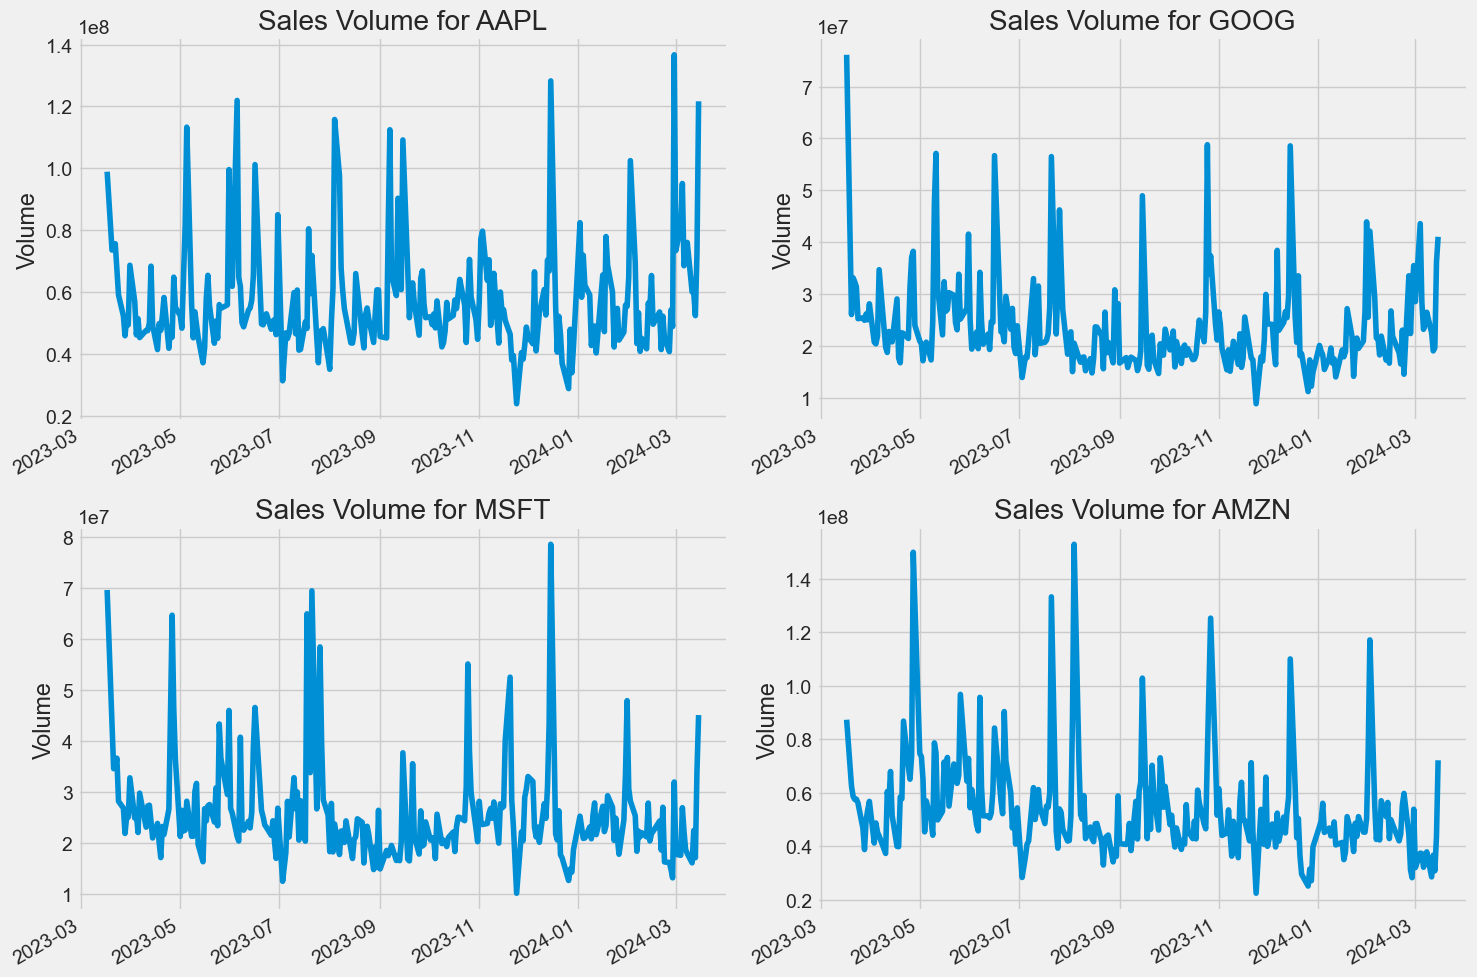

In [17]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## 2. Moving Average of the Stocks

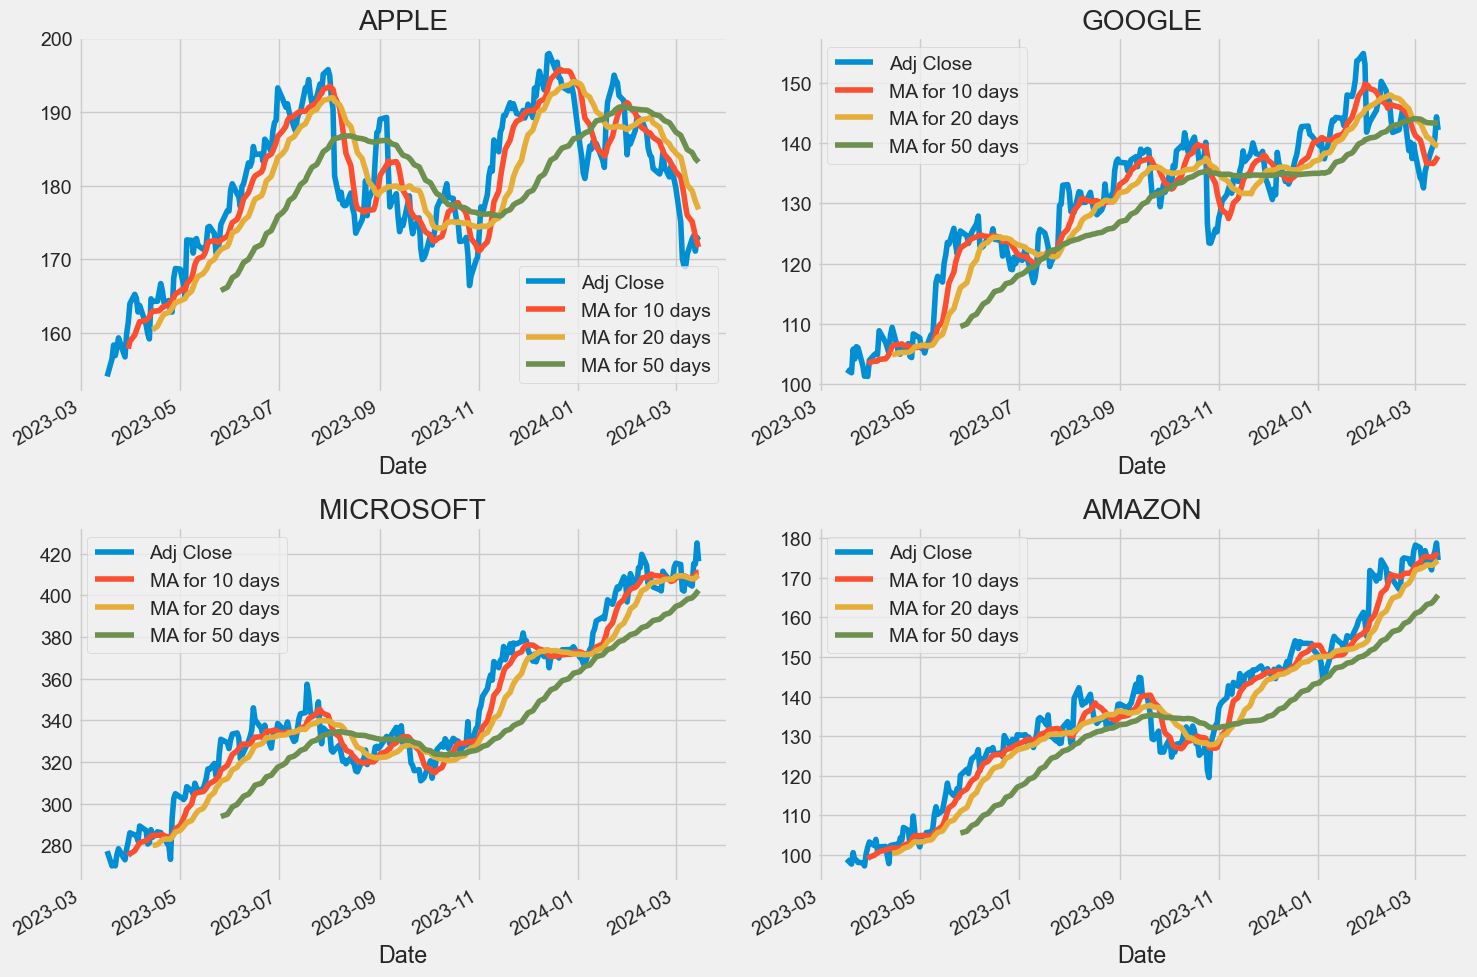

In [18]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 3. Daily return of the stock on average

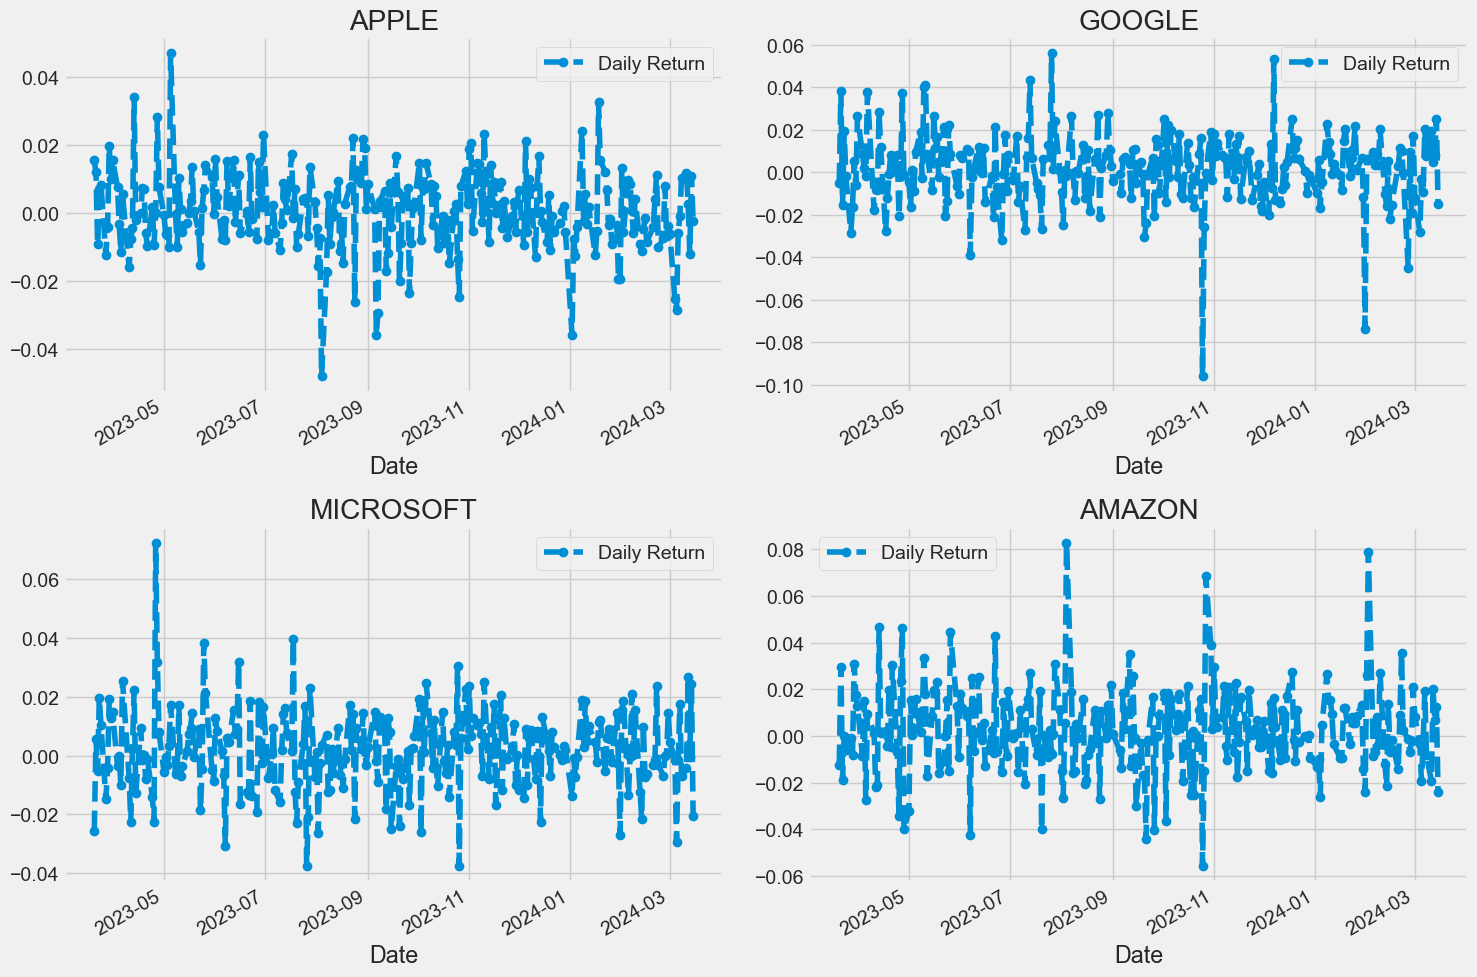

In [19]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### Daily return using a histogram

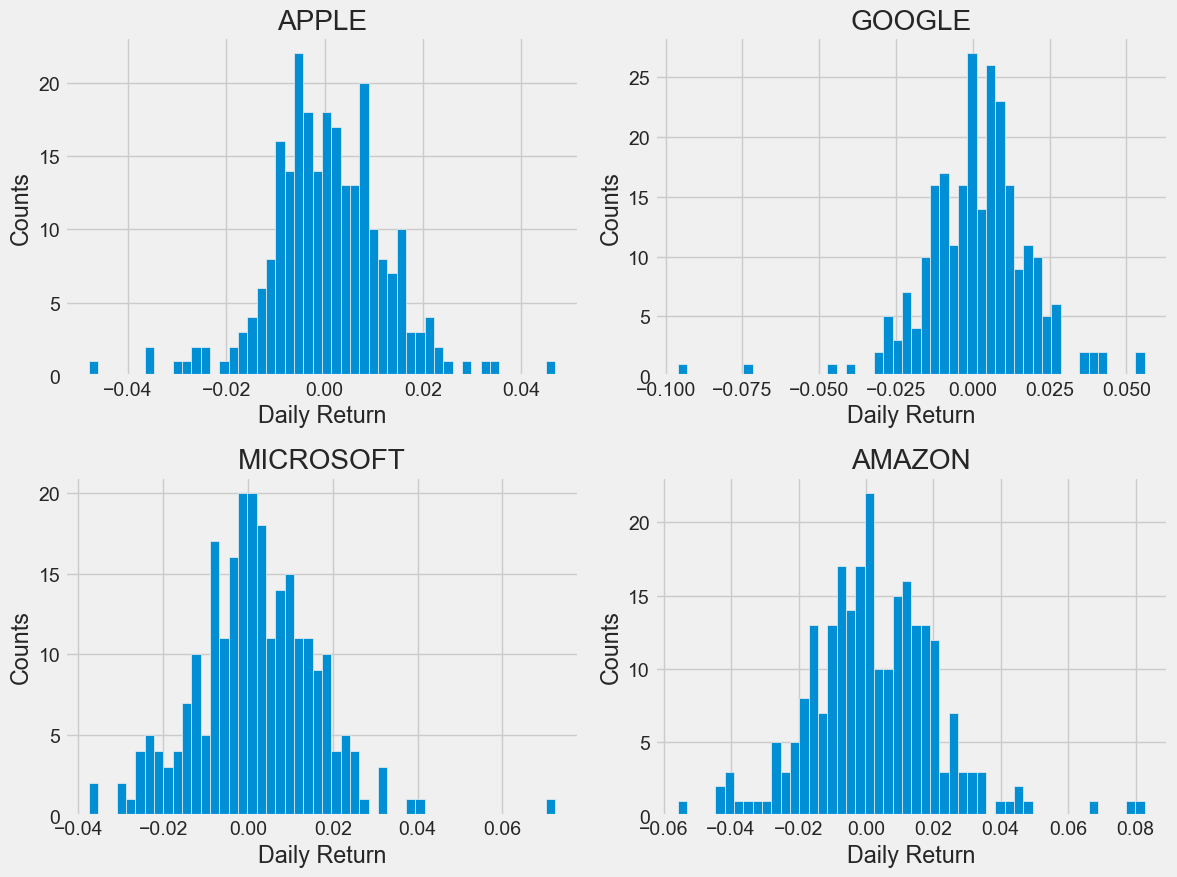

In [20]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## 4. Correlation between different stocks closing prices

In [21]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-03-17,NaN,NaN,NaN,NaN
2023-03-20,0.015484,-0.012532,-0.005173,-0.025767
2023-03-21,0.011944,0.029680,0.038360,0.005694
2023-03-22,-0.009103,-0.018984,-0.015306,-0.005442
2023-03-23,0.006969,0.000101,0.019574,0.019722


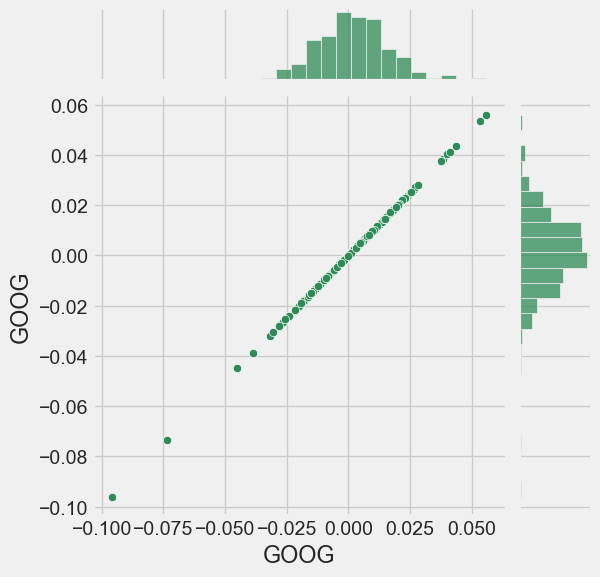

In [22]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

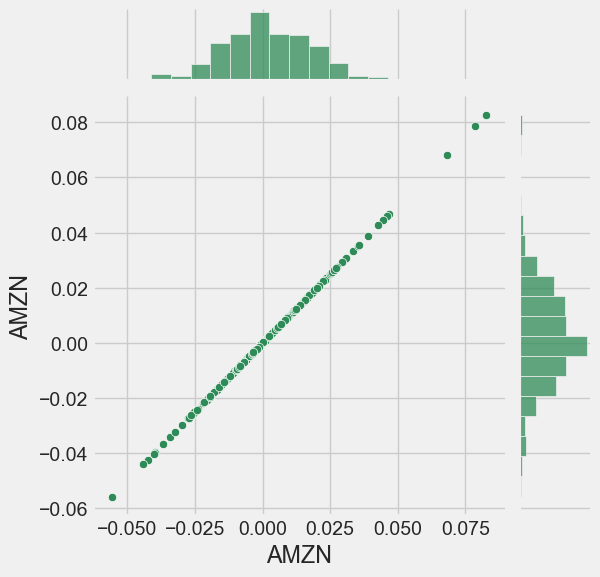

In [23]:
# Comparing Amazon to itself should show a perfectly linear relationship
sns.jointplot(x='AMZN', y='AMZN', data=tech_rets, kind='scatter', color='seagreen')

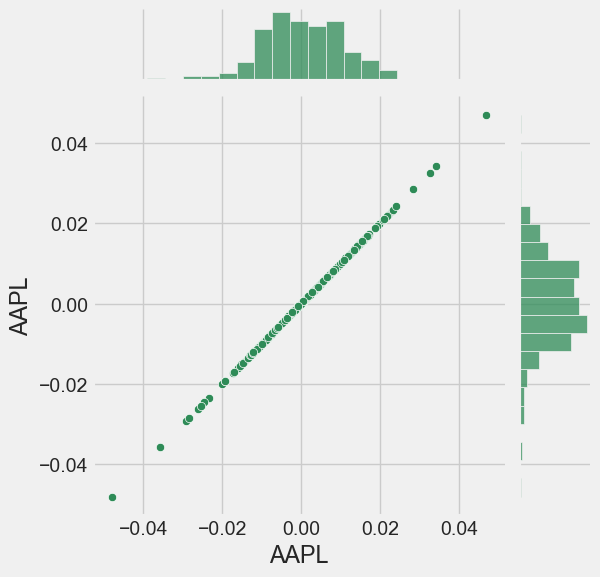

In [24]:
# Comparing Apple to itself should show a perfectly linear relationship
sns.jointplot(x='AAPL', y='AAPL', data=tech_rets, kind='scatter', color='seagreen')

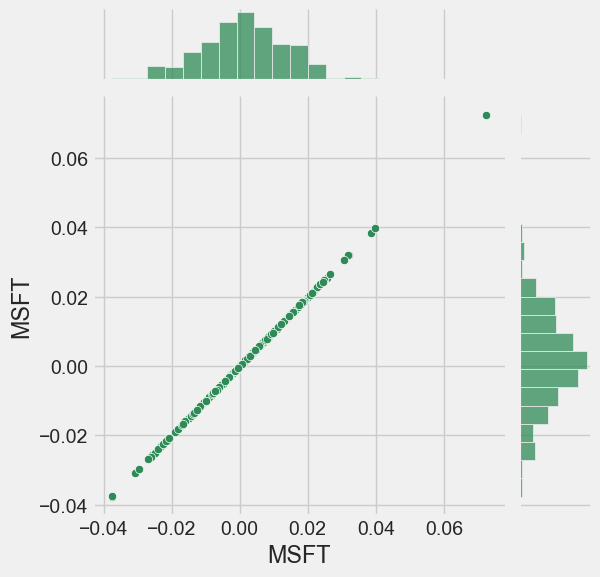

In [25]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='MSFT', y='MSFT', data=tech_rets, kind='scatter', color='seagreen')

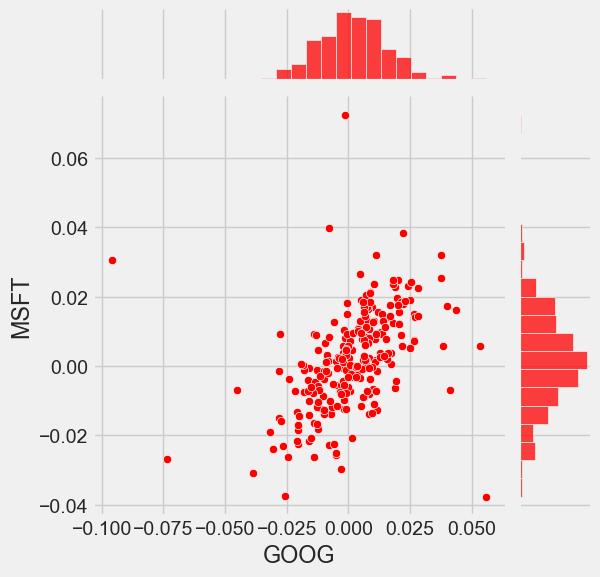

In [26]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter',color='red')

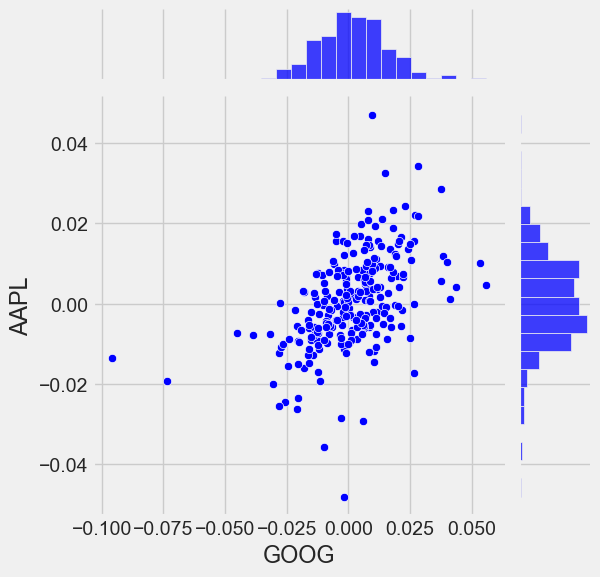

In [27]:
# We'll use joinplot to compare the daily returns of Google and Apple
sns.jointplot(x='GOOG', y='AAPL', data=tech_rets, kind='scatter',color='blue')

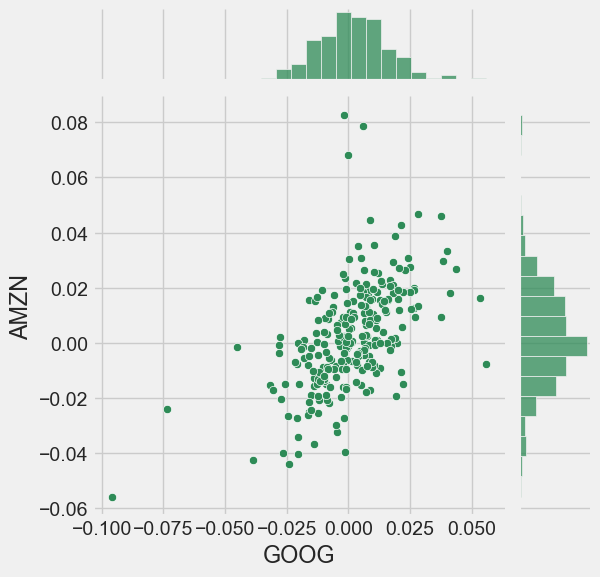

In [28]:
# We'll use joinplot to compare the daily returns of Google and Amazon
sns.jointplot(x='GOOG', y='AMZN', data=tech_rets, kind='scatter',color='seagreen')

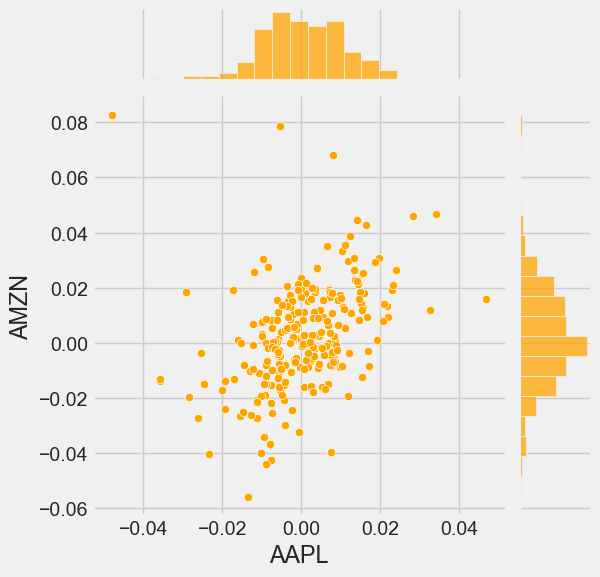

In [29]:
# We'll use joinplot to compare the daily returns of Apple and Amazon
sns.jointplot(x='AAPL', y='AMZN', data=tech_rets, kind='scatter',color='orange')

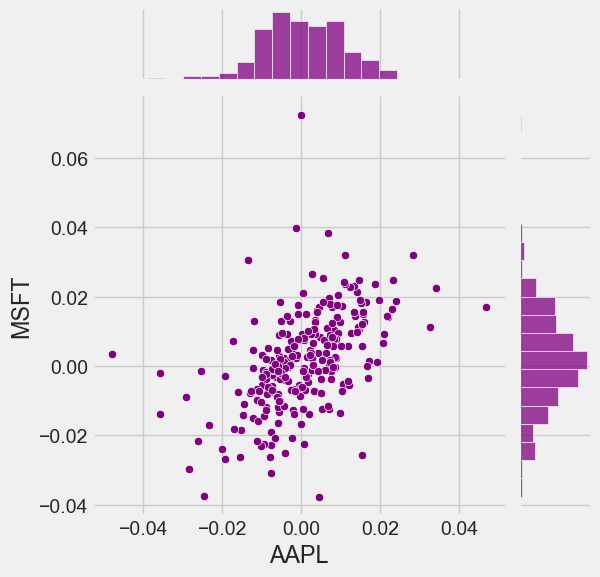

In [30]:
# We'll use joinplot to compare the daily returns of Apple and Microsoft
sns.jointplot(x='AAPL', y='MSFT', data=tech_rets, kind='scatter',color='purple')

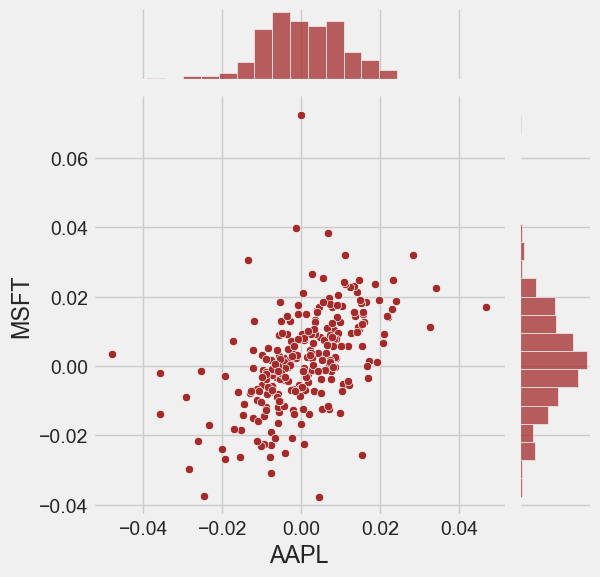

In [31]:
# We'll use joinplot to compare the daily returns of Amazon and Microsoft
sns.jointplot(x='AAPL', y='MSFT', data=tech_rets, kind='scatter',color='brown')

### Visual analysis of all the comparisons

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


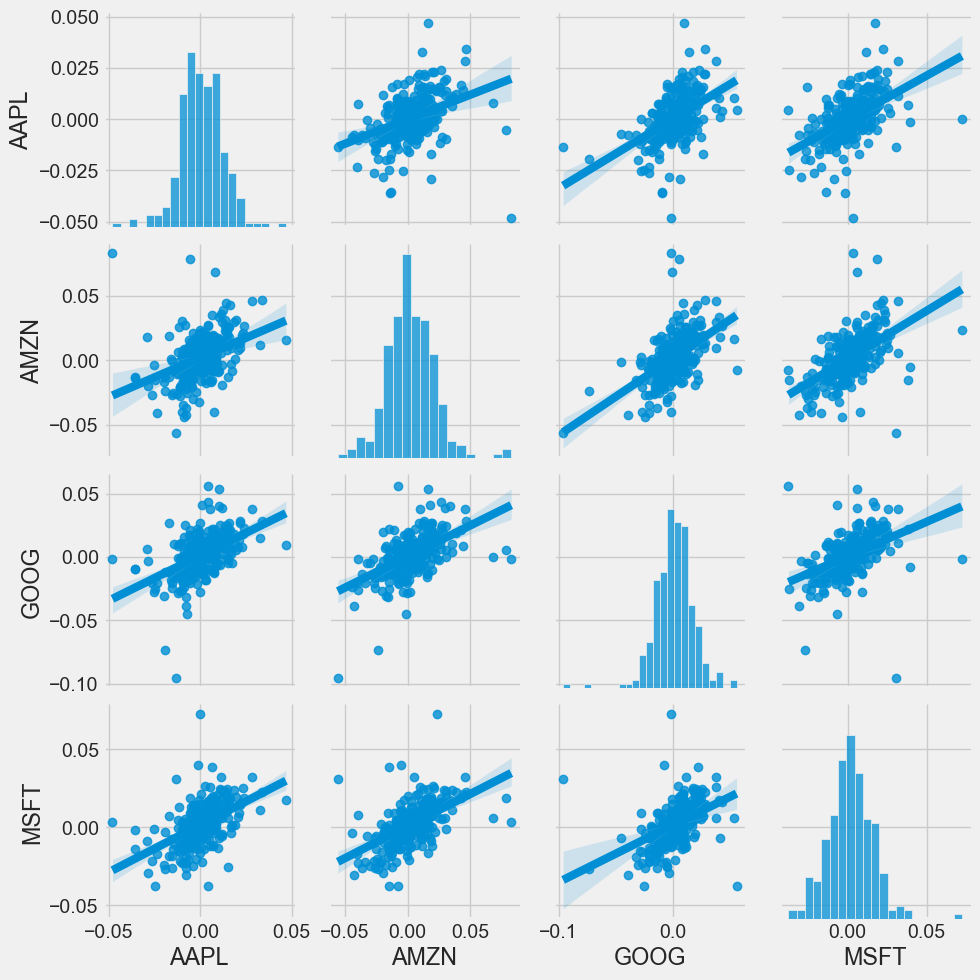

In [32]:
sns.pairplot(tech_rets, kind='reg')

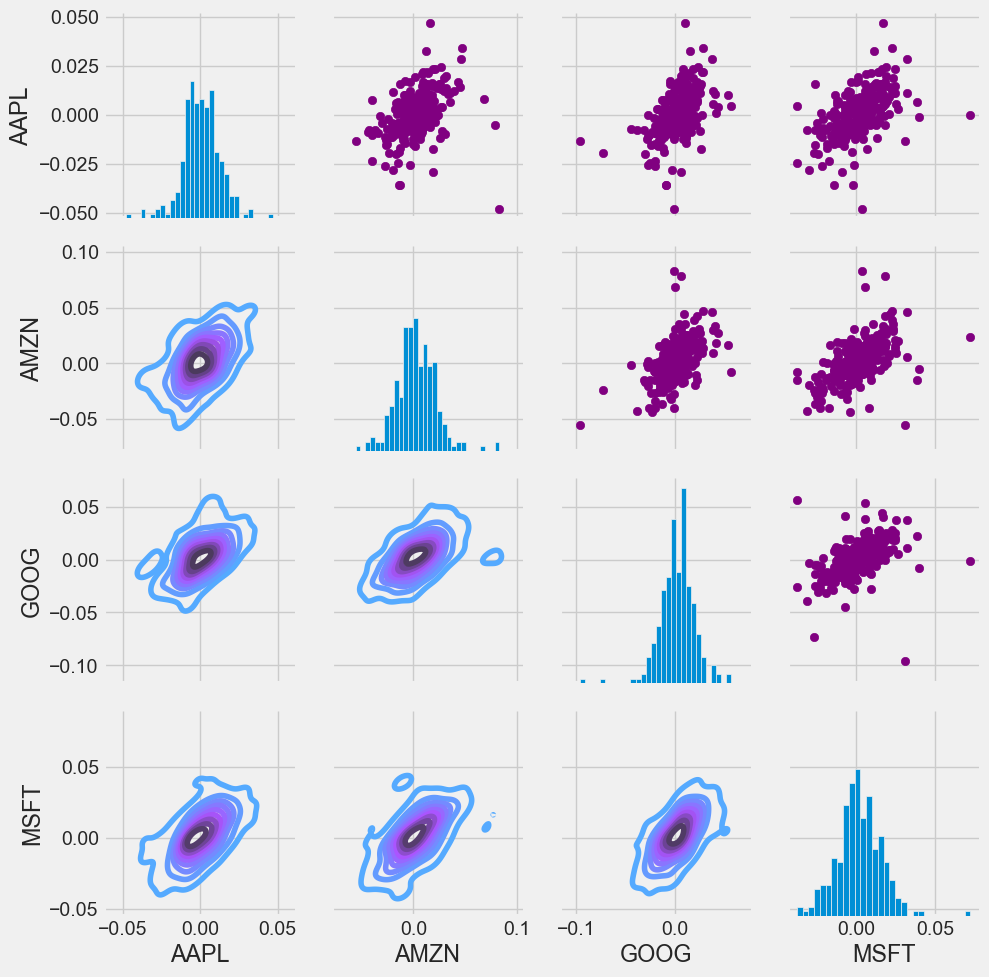

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

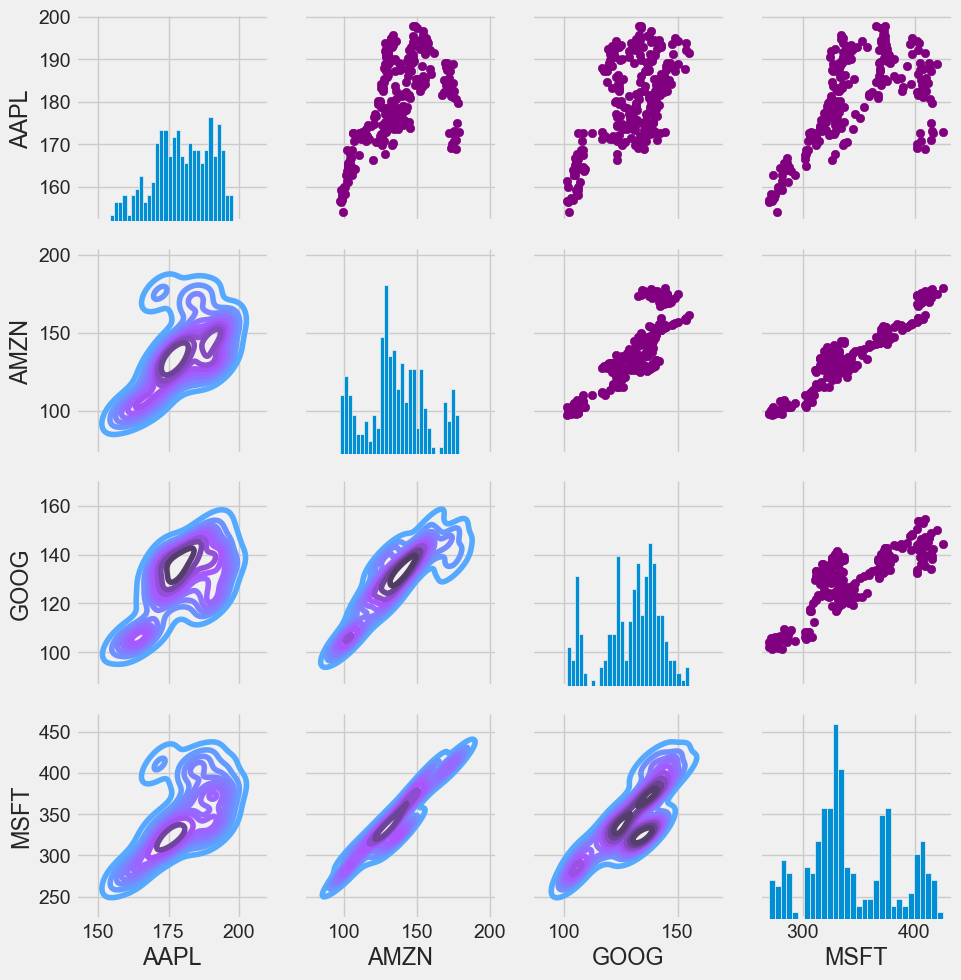

In [34]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

### Correlation of stock closing price

Text(0.5, 1.0, 'Correlation of stock closing price')

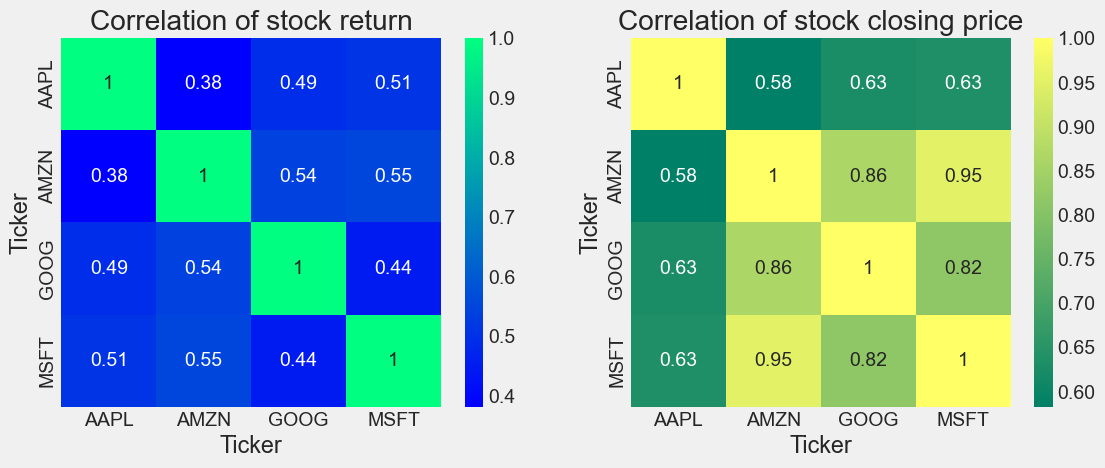

In [35]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='winter')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## 5. Risk level by Investing in a particular Stock

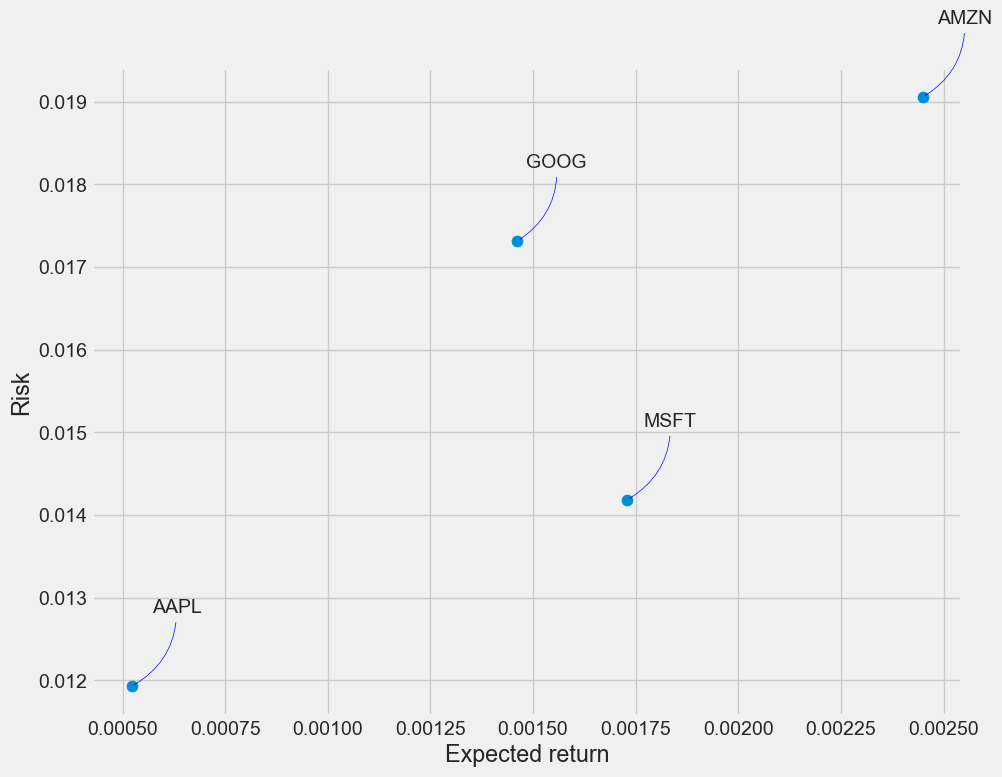

In [36]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## 6.  Predicting the closing price stock price of Stocks

### Predicting the closing price stock price of Apple

In [37]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2014-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.296658,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.916721,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.008968,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.887325,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.994272,258529600
...,...,...,...,...,...,...
2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500
2024-03-12,173.149994,174.029999,171.009995,173.229996,173.229996,59825400
2024-03-13,172.770004,173.190002,170.759995,171.130005,171.130005,52488700


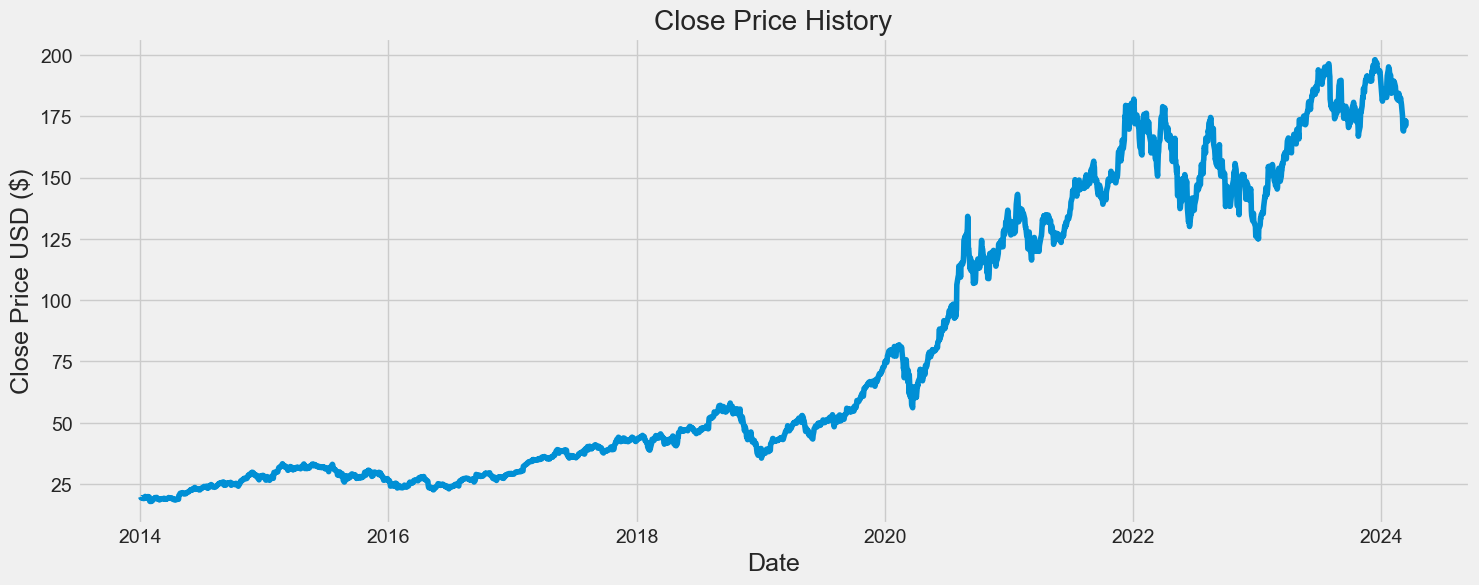

In [38]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [39]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2440

In [40]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01057001],
       [0.00816279],
       [0.00874725],
       ...,
       [0.85032792],
       [0.86070176],
       [0.85859367]])

In [41]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01057001, 0.00816279, 0.00874725, 0.00797655, 0.00865414,
       0.00727914, 0.00656985, 0.00712263, 0.00923465, 0.01140808,
       0.01079191, 0.00810136, 0.00976563, 0.01024905, 0.01117429,
       0.00917125, 0.01004893, 0.00133141, 0.00019218, 0.        ,
       0.00016246, 0.00034672, 0.00178511, 0.00253799, 0.00252214,
       0.0039427 , 0.00578726, 0.0071682 , 0.00716026, 0.00884632,
       0.00875914, 0.0091554 , 0.00744755, 0.00621521, 0.00504626,
       0.00550195, 0.00441425, 0.00348107, 0.00552573, 0.00524242,
       0.00554356, 0.00623304, 0.00645494, 0.00613595, 0.00607454,
       0.00616964, 0.00719394, 0.00729697, 0.00611615, 0.00493532,
       0.00534148, 0.00626474, 0.006237  , 0.0057298 , 0.00655598,
       0.00780814, 0.00895727, 0.00792503, 0.00746538, 0.0073465 ])]
[0.0073227358419393485]

[array([0.01057001, 0.00816279, 0.00874725, 0.00797655, 0.00865414,
       0.00727914, 0.00656985, 0.00712263, 0.00923465, 0.01140808,
       0.01079191, 0.00810136, 0.

In [43]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b325c163d730562bb6deb1ace5acbed0306f5fbefb90e/flatbuffers-24.3.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\gsaig\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2380/2380 ━━━━━━━━━━━━━━━━━━━━ 122s 49ms/step - loss: 0.0044


In [46]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


10.679915858657946

C:\Users\gsaig\AppData\Local\Temp\ipykernel_15560\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


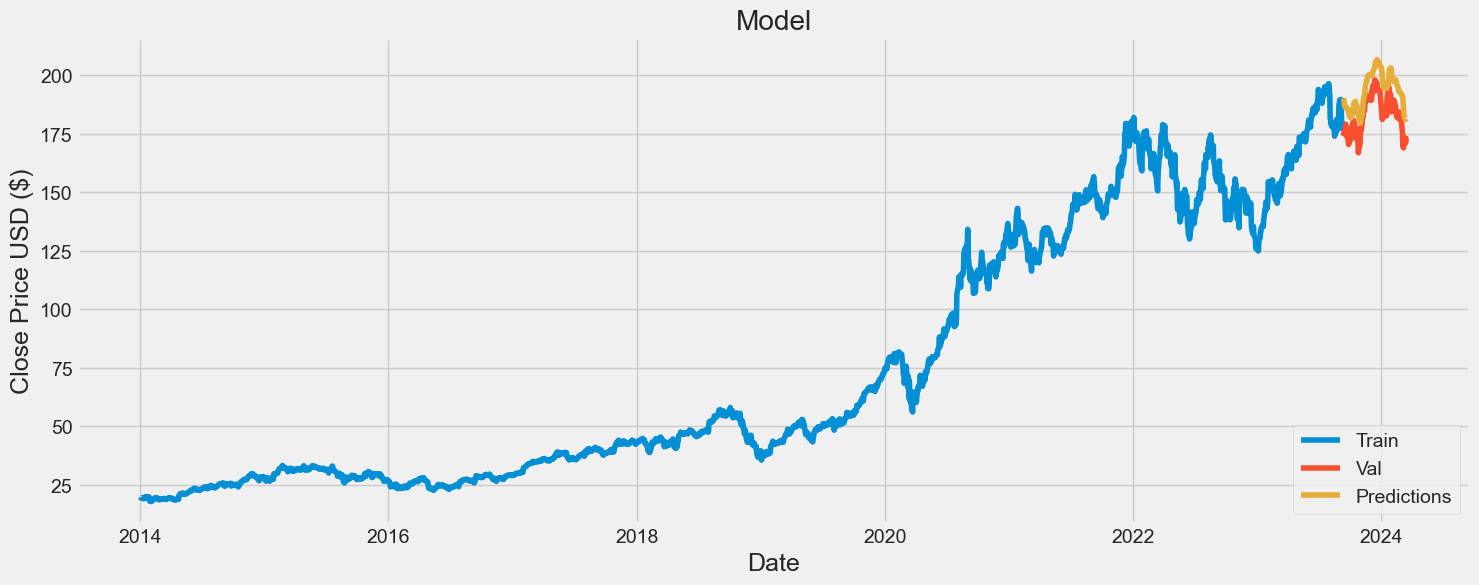

In [47]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [63]:
# Show the valid and predicted prices for Apple Stocks
print('Closing and Predicted prices for Apple Stocks')
valid

Closing and Predicted prices for Apple Stocks


,Close,Predictions
Date,,
2023-09-13,137.500000,142.954163
2023-09-14,138.990005,143.117203
2023-09-15,138.300003,143.580383
2023-09-18,138.960007,143.945175
2023-09-19,138.830002,144.342133
...,...,...
2024-03-11,138.940002,141.908661
2024-03-12,139.619995,142.610489
2024-03-13,140.770004,143.579819


### Predicting the closing price stock price of Google

In [52]:
# Get the stock quote
df = pdr.get_data_yahoo('GOOG', start='2014-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
...,...,...,...,...,...,...
2024-03-11,137.070007,139.979996,137.070007,138.940002,138.940002,22536400
2024-03-12,138.250000,140.279999,138.210007,139.619995,139.619995,19019700
2024-03-13,140.059998,142.190002,140.009995,140.770004,140.770004,19637000


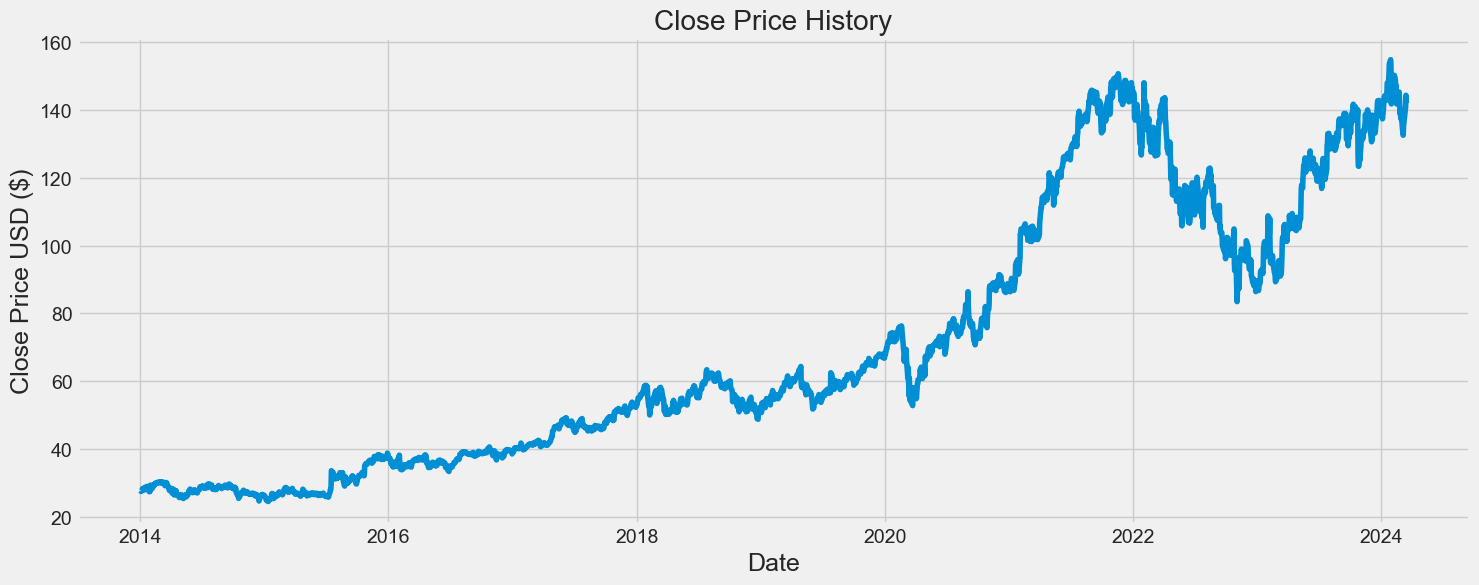

In [53]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [55]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02428627],
       [0.0227339 ],
       [0.02508922],
       ...,
       [0.89200184],
       [0.91940431],
       [0.90274789]])

In [56]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02428627, 0.0227339 , 0.02508922, 0.02920718, 0.02966028,
       0.02755923, 0.02754776, 0.02617129, 0.03122219, 0.03107308,
       0.03252604, 0.03143824, 0.03395605, 0.03420841, 0.03326781,
       0.02633378, 0.02201316, 0.02617701, 0.02310097, 0.02854379,
       0.03725769, 0.02816909, 0.02907337, 0.03003689, 0.03324104,
       0.03658283, 0.03572063, 0.03901843, 0.03835123, 0.04087669,
       0.0414311 , 0.04297582, 0.04134317, 0.04168155, 0.04162037,
       0.04328744, 0.04471936, 0.04475187, 0.04456833, 0.04388774,
       0.04141007, 0.04374627, 0.04438671, 0.04464481, 0.04372333,
       0.04310773, 0.0408939 , 0.04229141, 0.03880432, 0.03569577,
       0.0393855 , 0.04304846, 0.04075243, 0.04035286, 0.03765342,
       0.03285296, 0.03300397, 0.02788998, 0.02522627, 0.02581187])]
[0.024655994077787485]

[array([0.02428627, 0.0227339 , 0.02508922, 0.02920718, 0.02966028,
       0.02755923, 0.02754776, 0.02617129, 0.03122219, 0.03107308,
       0.03252604, 0.03143824, 0.0

In [58]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


7.3636592491203245

C:\Users\gsaig\AppData\Local\Temp\ipykernel_15560\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


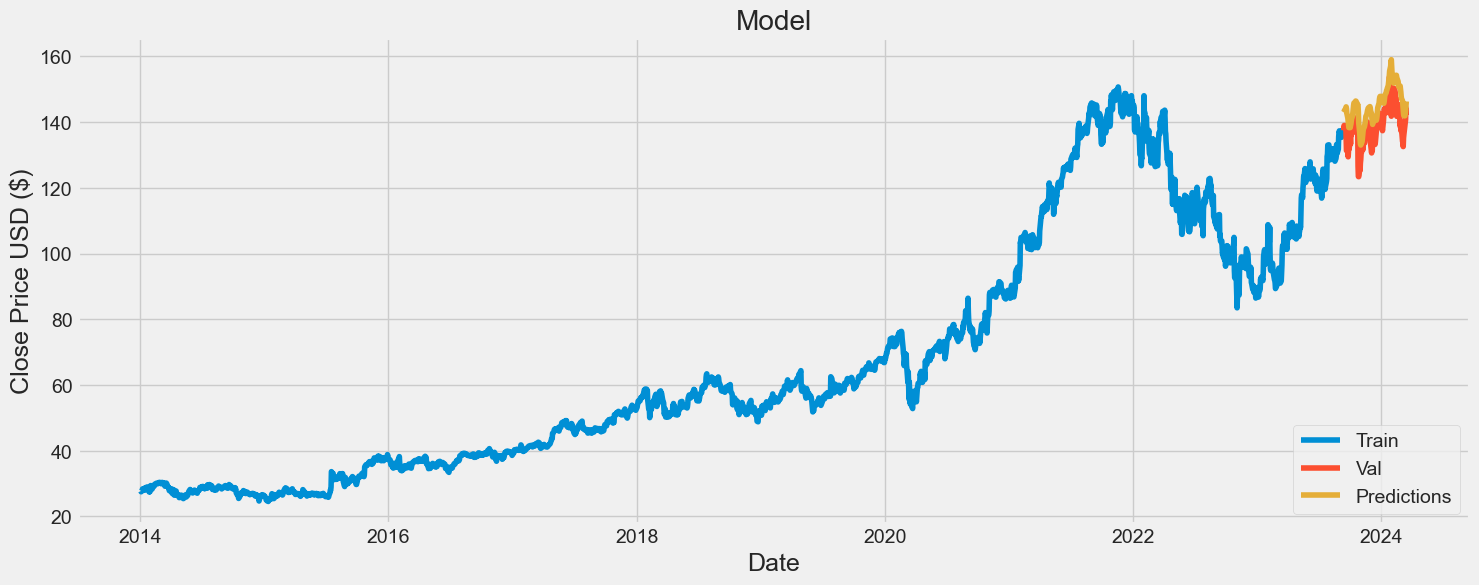

In [59]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [64]:
# Show the valid and predicted prices for Google
print('Closing and Predicted prices for Google Stock')
valid

Closing and Predicted prices for Google Stock


,Close,Predictions
Date,,
2023-09-13,137.500000,142.954163
2023-09-14,138.990005,143.117203
2023-09-15,138.300003,143.580383
2023-09-18,138.960007,143.945175
2023-09-19,138.830002,144.342133
...,...,...
2024-03-11,138.940002,141.908661
2024-03-12,139.619995,142.610489
2024-03-13,140.770004,143.579819


### Predicting the closing price stock price of Microsoft

In [65]:
# Get the stock quote
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238752,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738585,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960724,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301882,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008337,59706800
...,...,...,...,...,...,...
2024-03-11,403.760010,405.679993,401.260010,404.519989,404.519989,16120800
2024-03-12,407.619995,415.570007,406.790009,415.279999,415.279999,22457000
2024-03-13,418.100006,418.179993,411.450012,415.100006,415.100006,17115900


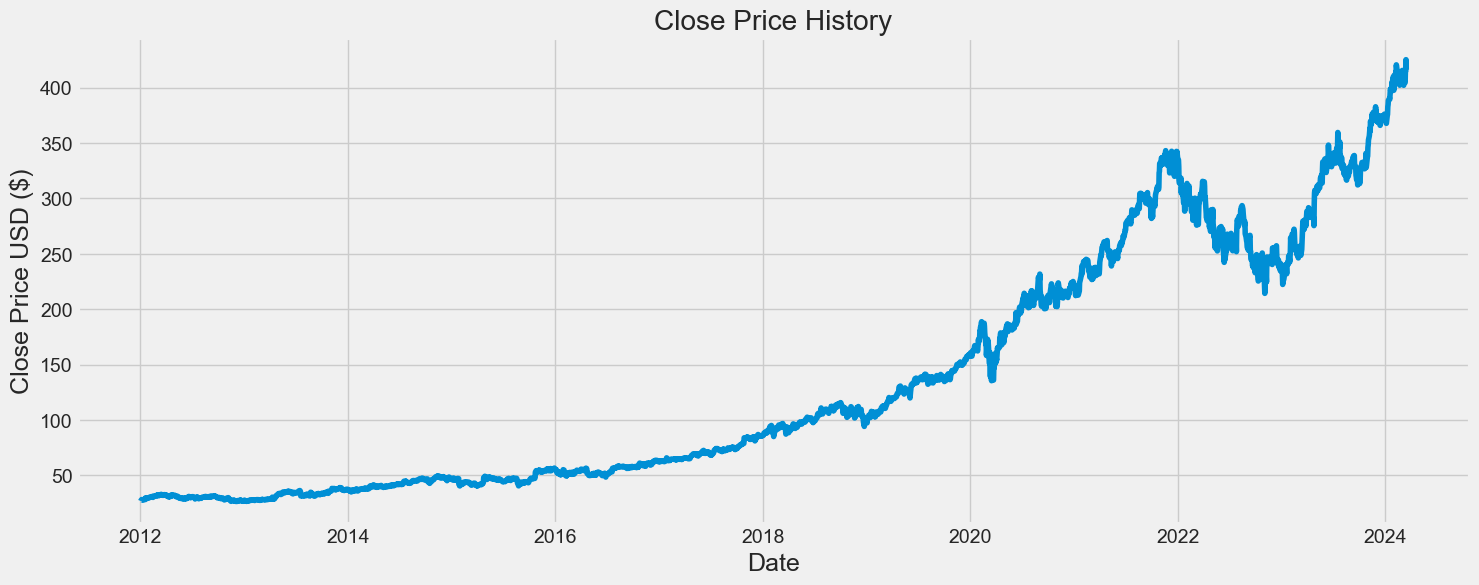

In [66]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [67]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02428627],
       [0.0227339 ],
       [0.02508922],
       ...,
       [0.89200184],
       [0.91940431],
       [0.90274789]])

In [68]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02428627, 0.0227339 , 0.02508922, 0.02920718, 0.02966028,
       0.02755923, 0.02754776, 0.02617129, 0.03122219, 0.03107308,
       0.03252604, 0.03143824, 0.03395605, 0.03420841, 0.03326781,
       0.02633378, 0.02201316, 0.02617701, 0.02310097, 0.02854379,
       0.03725769, 0.02816909, 0.02907337, 0.03003689, 0.03324104,
       0.03658283, 0.03572063, 0.03901843, 0.03835123, 0.04087669,
       0.0414311 , 0.04297582, 0.04134317, 0.04168155, 0.04162037,
       0.04328744, 0.04471936, 0.04475187, 0.04456833, 0.04388774,
       0.04141007, 0.04374627, 0.04438671, 0.04464481, 0.04372333,
       0.04310773, 0.0408939 , 0.04229141, 0.03880432, 0.03569577,
       0.0393855 , 0.04304846, 0.04075243, 0.04035286, 0.03765342,
       0.03285296, 0.03300397, 0.02788998, 0.02522627, 0.02581187])]
[0.024655994077787485]

[array([0.02428627, 0.0227339 , 0.02508922, 0.02920718, 0.02966028,
       0.02755923, 0.02754776, 0.02617129, 0.03122219, 0.03107308,
       0.03252604, 0.03143824, 0.0

In [69]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\gsaig\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2380/2380 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - loss: 0.0050


In [70]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


5.006957083342351

C:\Users\gsaig\AppData\Local\Temp\ipykernel_15560\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


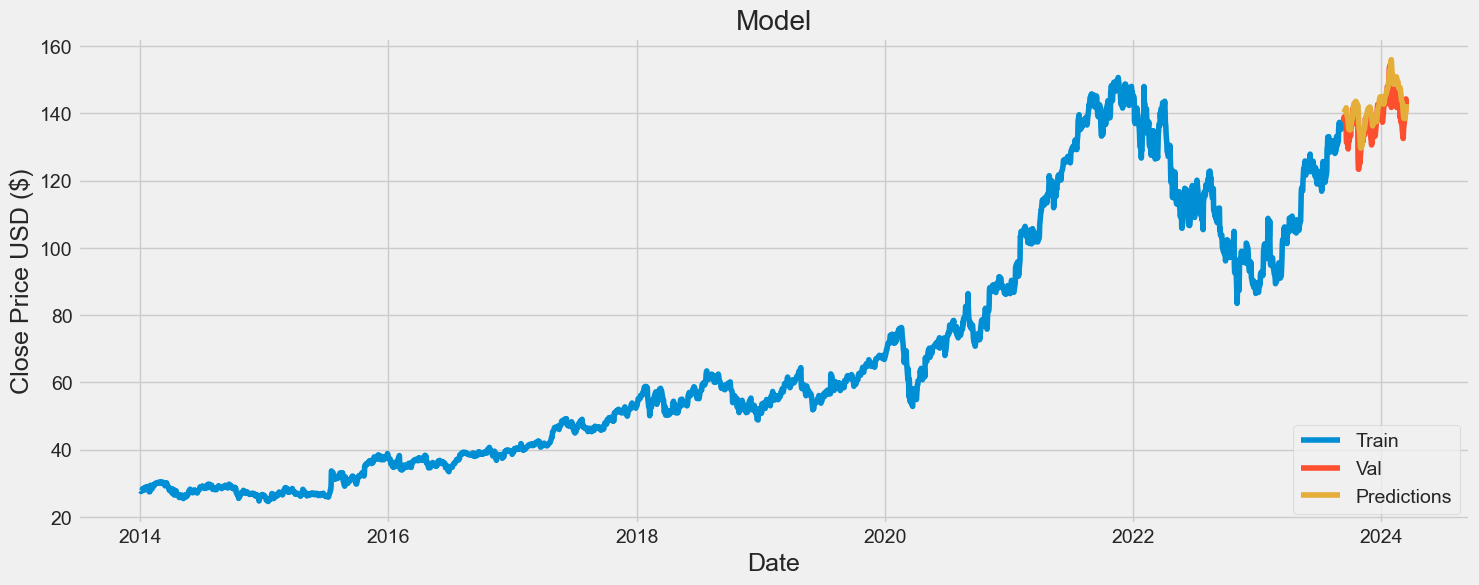

In [71]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [73]:
# Show the valid and predicted prices for Microsoft Stock
print('Closing and Predicted prices for Microsoft Stocks')
valid

Closing and Predicted prices for Microsoft Stocks


,Close,Predictions
Date,,
2023-09-13,137.500000,140.165344
2023-09-14,138.990005,140.289673
2023-09-15,138.300003,140.692596
2023-09-18,138.960007,141.023163
2023-09-19,138.830002,141.393814
...,...,...
2024-03-11,138.940002,138.468704
2024-03-12,139.619995,139.094681
2024-03-13,140.770004,140.043259


### Predicting the closing price stock price of Amazon

In [75]:
# Get the stock quote
df = pdr.get_data_yahoo('AMZN', start='2014-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.940001,19.968000,19.701000,19.898500,19.898500,42756000
2014-01-03,19.914499,20.135500,19.811001,19.822001,19.822001,44204000
2014-01-06,19.792500,19.850000,19.421000,19.681499,19.681499,63412000
2014-01-07,19.752001,19.923500,19.714500,19.901501,19.901501,38320000
2014-01-08,19.923500,20.150000,19.802000,20.096001,20.096001,46330000
...,...,...,...,...,...,...
2024-03-11,174.309998,174.470001,171.470001,171.960007,171.960007,28484800
2024-03-12,173.500000,176.759995,171.979996,175.389999,175.389999,36610600
2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30772600


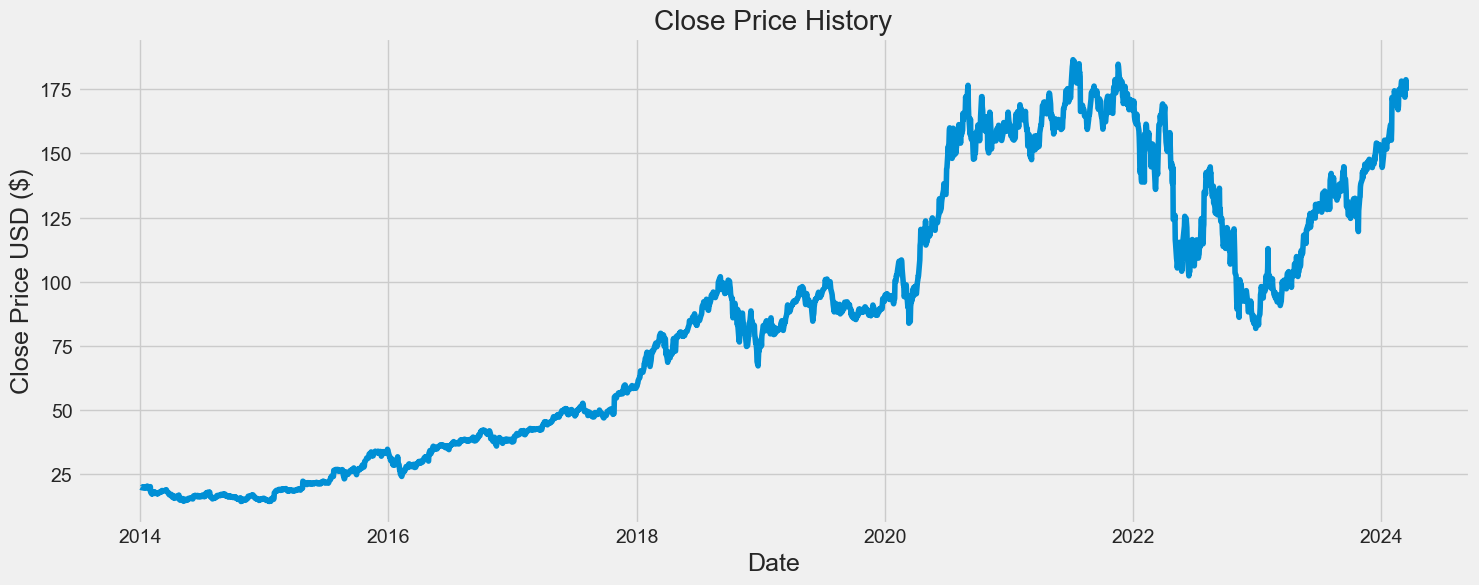

In [76]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [77]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02428627],
       [0.0227339 ],
       [0.02508922],
       ...,
       [0.89200184],
       [0.91940431],
       [0.90274789]])

In [78]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02428627, 0.0227339 , 0.02508922, 0.02920718, 0.02966028,
       0.02755923, 0.02754776, 0.02617129, 0.03122219, 0.03107308,
       0.03252604, 0.03143824, 0.03395605, 0.03420841, 0.03326781,
       0.02633378, 0.02201316, 0.02617701, 0.02310097, 0.02854379,
       0.03725769, 0.02816909, 0.02907337, 0.03003689, 0.03324104,
       0.03658283, 0.03572063, 0.03901843, 0.03835123, 0.04087669,
       0.0414311 , 0.04297582, 0.04134317, 0.04168155, 0.04162037,
       0.04328744, 0.04471936, 0.04475187, 0.04456833, 0.04388774,
       0.04141007, 0.04374627, 0.04438671, 0.04464481, 0.04372333,
       0.04310773, 0.0408939 , 0.04229141, 0.03880432, 0.03569577,
       0.0393855 , 0.04304846, 0.04075243, 0.04035286, 0.03765342,
       0.03285296, 0.03300397, 0.02788998, 0.02522627, 0.02581187])]
[0.024655994077787485]

[array([0.02428627, 0.0227339 , 0.02508922, 0.02920718, 0.02966028,
       0.02755923, 0.02754776, 0.02617129, 0.03122219, 0.03107308,
       0.03252604, 0.03143824, 0.0

In [79]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\gsaig\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2380/2380 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 0.0033


In [81]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


3.646556639456376

C:\Users\gsaig\AppData\Local\Temp\ipykernel_15560\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


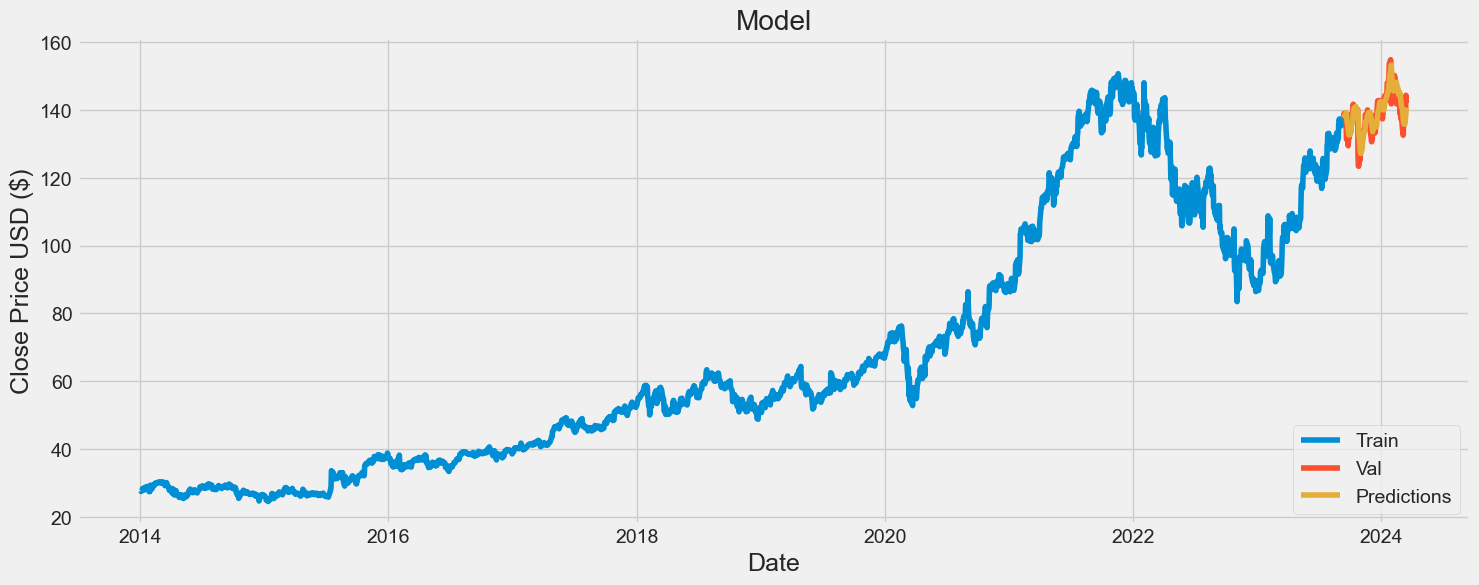

In [82]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [83]:
# Show the valid and predicted prices for Amazon
print('Closing and Predicted prices for Amazon Stocks')
valid

Closing and Predicted prices for Amazon Stocks


,Close,Predictions
Date,,
2023-09-13,137.500000,137.627777
2023-09-14,138.990005,137.763397
2023-09-15,138.300003,138.224960
2023-09-18,138.960007,138.567795
2023-09-19,138.830002,138.945175
...,...,...
2024-03-11,138.940002,135.897064
2024-03-12,139.619995,136.734741
2024-03-13,140.770004,137.816177
